In [1]:
import pandas as pd
import random
import os
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_train.csv'
test_path = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_test.csv'

train_df = pd.read_csv(train_path)
train_df.shape

#시계열 데이터
for i in train_df.columns:
  print(i)

X = train_df.drop(columns=['ID', 'Unnamed: 0.1', 'Segment.1', 'Segment'])
Y = train_df['Segment']

Mounted at /content/drive
Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한도보유여부_R3M
연체감액여부_R3M
한도심사요청건수
한도요청거절건수
한도심사요청후경과월
한도심사거절후경과월
시장단기연체여부_R6M
rv최초시작후경과일
증감율_이용건수_신용_전월
증감율

금융 정보 & 연체/잔액 관련
신용 위험 & 금융 습관 분석

In [2]:
import pandas as pd
# 1) 파일 경로 지정
train_path = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_train.csv'
test_path  = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_test.csv'

# 2) 데이터 로드
train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

# 3) 금융정보_연체잔액 키워드 정의
keywords = [
    '한도','이자율','RV약정청구율','RV최소결제비율',
    '잔액','평잔','변동률','연체','RP'
]

# 4) train에서 키워드 매칭 컬럼 추출
financial_train = [c for c in train.columns if any(k in c for k in keywords)]

# 5) test에도 동일한 컬럼이 있는지 확인 (train↔test 간 mismatch 방지)
financial_common = [c for c in financial_train if c in test.columns]

print(f"매칭된 공통 컬럼 수: {len(financial_common)}개")
print(financial_common)

매칭된 공통 컬럼 수: 168개
['연체건수_R6M', '연체건수_R3M', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액', 'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', 'RV약정청구율', 'RV최소결제비율', '자발한도감액횟수_R12M', '자발한도감액금액_R12M', '자발한도감액후경과월', '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월', '한도증액횟수_R12M', '한도증액금액_R12M', '한도증액후경과월', '상향가능한도금액', '상향가능CA한도금액', '월상환론상향가능한도금액', '카드이용한도금액_B1M', '카드이용한도금액_B2M', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수', '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m', '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔', '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M', '회원여부_연체', '동의여부_한도증액안내', 'IB문의건수_한도_R6M', '잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M', '잔액_리볼빙일시불이월_B0M', '잔액_리볼빙CA이월_B0M', '잔액_카드론_B0M', '월중평잔_일시불_B0M', '월중평잔_할부_B0M', '월중평잔_CA_B0M', '연체일자_B0M', '연체잔액_B0M', '연체잔

In [3]:
import pandas as pd

# 1. 데이터 로드
train_path = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_train.csv'
test_path = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_test.csv'
train = pd.read_csv(train_path)

# 2. 금융정보_연체 관련 키워드로 컬럼 필터링
keywords = ['한도','이자율','RV약정청구율','RV최소결제비율','잔액','평잔','변동률','연체','RP']
financial_common = [col for col in train.columns if any(k in col for k in keywords)]

# 3. 결측치 개수 및 비율 계산
missing_count = train[financial_common].isna().sum()
missing_pct = (missing_count / len(train)) * 100

# 4. 데이터프레임으로 정리
missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct(%)': missing_pct.round(2)
}).sort_values(by='missing_pct(%)', ascending=False)

# 5. 출력
print(f"총 샘플 수: {len(train)}")
print(missing_df.head(20))


총 샘플 수: 70560
                missing_count  missing_pct(%)
연체일자_B0M                70402           99.78
연체건수_R6M                    0            0.00
최초한도금액                      0            0.00
연체건수_R3M                    0            0.00
CA한도금액                      0            0.00
일시상환론한도금액                   0            0.00
월상환론한도금액                    0            0.00
카드이용한도금액                    0            0.00
CL이자율_할인전                   0            0.00
RV일시불이자율_할인전                0            0.00
RV현금서비스이자율_할인전              0            0.00
RV약정청구율                     0            0.00
RV최소결제비율                    0            0.00
자발한도감액횟수_R12M               0            0.00
자발한도감액금액_R12M               0            0.00
자발한도감액후경과월                  0            0.00
강제한도감액횟수_R12M               0            0.00
강제한도감액금액_R12M               0            0.00
강제한도감액후경과월                  0            0.00
한도증액횟수_R12M                 0            0.00


In [4]:
# 연체일자_B0M -> 연체 없음 0, 연체 있음 1 값으로 대체
train['is_overdue_B0M'] = train['연체일자_B0M'].notnull().astype(int)
print(train['is_overdue_B0M'].value_counts())

# 기존 컬럼 필터링된 데이터 + 연체일자 파생 변수
x_train = train[financial_common + ['is_overdue_B0M']].copy()

print(x_train.shape)
x_train.head()

is_overdue_B0M
0    70402
1      158
Name: count, dtype: int64
(70560, 169)


,연체건수_R6M,연체건수_R3M,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,이용횟수_연체_R3M,이용금액_연체_R3M,이용횟수_연체_B0M,이용금액_연체_B0M,연체입금원금_B0M,연체입금원금_B2M,연체입금원금_B5M,승인거절건수_한도초과_B0M,승인거절건수_한도초과_R3M,is_overdue_B0M
0,0,0,0,100009,38981,90007,180503,14.667465,15.294701,10.859084,...,0,0,0,0,1484,0,474,0,0,0
1,0,0,0,41180,10637,0,0,14.220065,10.900466,10.457245,...,0,0,0,0,91,0,2479,0,0,0
2,0,0,9999,40798,12115,90008,206098,14.738940,14.881989,10.581995,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,29999,10841,90009,206308,14.220996,14.871830,10.249980,...,0,0,0,0,0,0,805,0,0,0
4,0,0,0,18989,6480,0,93789,14.820947,14.863630,10.930048,...,0,0,0,0,441,1497,0,0,0,0


In [5]:
# object 확인
x_train.dtypes.value_counts()

,count
int64,142
float64,24
object,3


In [6]:
from sklearn.preprocessing import LabelEncoder

# 1. object 타입 컬럼 추출
object_cols = x_train.select_dtypes(include='object').columns
print(f"인코딩 대상 컬럼: {list(object_cols)}")

# 2. 각 컬럼별 LabelEncoder 적용
le = LabelEncoder()
for col in object_cols:
    x_train[col] = le.fit_transform(x_train[col].astype(str))  # NaN 방지 위해 문자열로 처리

print(x_train[object_cols].head())

y_train = train['Segment']
print(y_train.value_counts())


인코딩 대상 컬럼: ['자발한도감액횟수_R12M', '한도증액횟수_R12M', '한도심사요청건수']
   자발한도감액횟수_R12M  한도증액횟수_R12M  한도심사요청건수
0              0            0         0
1              0            0         0
2              0            0         0
3              0            0         0
4              0            0         0
Segment
E    56505
D    10270
C     3753
A       28
B        4
Name: count, dtype: int64


train set 훈련/검증 분리

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 타깃 이진화: E → 1, 나머지(A~D) → 0
y_binary = (y_train == 'E').astype(int)

# 2. 학습/검증 세트 분리 (전체의 20%를 검증용)
X_tr, X_val, y_tr, y_val = train_test_split(
    x_train, y_binary,
    test_size=0.2,
    stratify=y_binary,
    random_state=42
)

# 3. 모델 정의 및 학습 (클래스 불균형 보정)
clf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
clf.fit(X_tr, y_tr)

# 4. 예측
y_pred = clf.predict(X_val)

# 5. 성능 평가
print(" [Classification Report]")
print(classification_report(y_val, y_pred, target_names=['Non-E', 'E']))

print("\n [Confusion Matrix]")
print(confusion_matrix(y_val, y_pred))


 [Classification Report]
              precision    recall  f1-score   support

       Non-E       0.77      0.53      0.63      2811
           E       0.89      0.96      0.92     11301

    accuracy                           0.87     14112
   macro avg       0.83      0.75      0.78     14112
weighted avg       0.87      0.87      0.87     14112


 [Confusion Matrix]
[[ 1502  1309]
 [  457 10844]]


2단계 멀티클래스 분류 모델 학습 (A/B/C/D)
여기서 a,b예측 실패 + c,d 불균형으로 d가 많아 편향됨

In [8]:
# 1단계 분류용 E 여부 레이블 생성
y_binary = (y_train == 'E').astype(int)

# ⛳ E가 아닌 데이터만 추출 (1단계 모델에서 Non-E에 해당)
non_e_mask = y_train != 'E'
x_train_non_e = x_train[non_e_mask]        # 설명변수
y_train_non_e = y_train[non_e_mask]        # 원래 다중 클래스 레이블 (A, B, C, D 중 하나)

# 이후 2단계 분류 수행
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 학습/검증 분리
X2_tr, X2_val, y2_tr, y2_val = train_test_split(
    x_train_non_e, y_train_non_e,
    test_size=0.2,
    stratify=y_train_non_e,
    random_state=42
)

# 모델 학습
clf_multi = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
clf_multi.fit(X2_tr, y2_tr)

# 평가
y2_pred = clf_multi.predict(X2_val)

print("[2단계 Classification Report]")
print(classification_report(y2_val, y2_pred))
print("[2단계 Confusion Matrix]")
print(confusion_matrix(y2_val, y2_pred))

[2단계 Classification Report]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00         1
           C       0.72      0.39      0.50       751
           D       0.81      0.95      0.87      2054

    accuracy                           0.80      2811
   macro avg       0.38      0.33      0.34      2811
weighted avg       0.78      0.80      0.77      2811

[2단계 Confusion Matrix]
[[   0    0    4    1]
 [   0    0    1    0]
 [   0    0  290  461]
 [   0    0  108 1946]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


a/b 를 ab로 병합

학습/검증 세트 분리 (d,c,ab)
모델 학습 및 평가 (randomforest)

In [9]:
# A/B를 'AB'로 병합
y_train_non_e_3class = y_train_non_e.replace({'A': 'AB', 'B': 'AB'})
print(y_train_non_e_3class.value_counts())

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 분리
X3_tr, X3_val, y3_tr, y3_val = train_test_split(
    x_train_non_e, y_train_non_e_3class,
    test_size=0.2,
    stratify=y_train_non_e_3class,
    random_state=42
)

# 모델 정의
clf_3class = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# 학습
clf_3class.fit(X3_tr, y3_tr)

# 예측
y3_pred = clf_3class.predict(X3_val)

# 평가
print("[3분류 Classification Report]")
print(classification_report(y3_val, y3_pred))

print("\n[3분류 Confusion Matrix]")
print(confusion_matrix(y3_val, y3_pred))



Segment
D     10270
C      3753
AB       32
Name: count, dtype: int64
[3분류 Classification Report]
              precision    recall  f1-score   support

          AB       0.00      0.00      0.00         6
           C       0.72      0.40      0.51       751
           D       0.81      0.95      0.87      2054

    accuracy                           0.80      2811
   macro avg       0.51      0.45      0.46      2811
weighted avg       0.79      0.80      0.78      2811


[3분류 Confusion Matrix]
[[   0    6    0]
 [   0  298  453]
 [   0  109 1945]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LightGBM으로 모델교체

In [10]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. 데이터: 기존 Non-E 대상 + AB 병합 완료된 타깃
# x_train_non_e, y_train_non_e_3class

# 2. 학습/검증 분리
X3_tr, X3_val, y3_tr, y3_val = train_test_split(
    x_train_non_e, y_train_non_e_3class,
    test_size=0.2,
    stratify=y_train_non_e_3class,
    random_state=42
)

# 3. 모델 정의
lgbm = LGBMClassifier(
    class_weight='balanced',   # 클래스 불균형 대응
    n_estimators=200,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

# 4. 학습
lgbm.fit(X3_tr, y3_tr)

# 5. 예측
y3_pred_lgbm = lgbm.predict(X3_val)

# 6. 평가
print("[3-Class Classification Report - LightGBM]")
print(classification_report(y3_val, y3_pred_lgbm))

print("\n[Confusion Matrix - LightGBM]")
print(confusion_matrix(y3_val, y3_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21461
[LightGBM] [Info] Number of data points in the train set: 11244, number of used features: 142
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

XGBoost로 모델교체

In [11]:
from sklearn.preprocessing import LabelEncoder

# 1. 타깃값 레이블 인코딩 (AB/C/D → 0/1/2)
le_y3 = LabelEncoder()
y3_tr_encoded = le_y3.fit_transform(y3_tr)
y3_val_encoded = le_y3.transform(y3_val)

# 2. XGBoost 모델 학습
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

xgb_clf.fit(X3_tr, y3_tr_encoded)

# 3. 예측
y3_pred_xgb = xgb_clf.predict(X3_val)

# 4. 디코딩 (숫자 → AB/C/D)
y3_pred_decoded = le_y3.inverse_transform(y3_pred_xgb)

# 5. 평가
from sklearn.metrics import classification_report, confusion_matrix

print("[3-Class Classification Report - XGBoost]")
print(classification_report(y3_val, y3_pred_decoded))

print("\n[Confusion Matrix - XGBoost]")
print(confusion_matrix(y3_val, y3_pred_decoded))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:19:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[3-Class Classification Report - XGBoost]
              precision    recall  f1-score   support

          AB       0.00      0.00      0.00         6
           C       0.68      0.50      0.58       751
           D       0.83      0.92      0.87      2054

    accuracy                           0.80      2811
   macro avg       0.51      0.47      0.48      2811
weighted avg       0.79      0.80      0.79      2811


[Confusion Matrix - XGBoost]
[[   0    6    0]
 [   0  375  376]
 [   1  167 1886]]


In [12]:
!apt-get -qq install -y fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

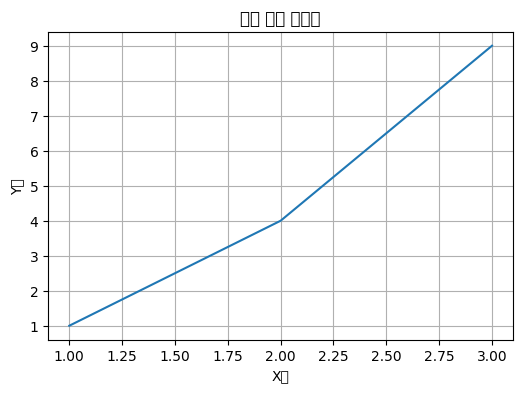

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# ✅ 설치된 경로 직접 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# ✅ 전역 설정
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# ✅ 테스트
plt.figure(figsize=(6, 4))
plt.title('한글 폰트 테스트')
plt.plot([1, 2, 3], [1, 4, 9])
plt.xlabel('X축')
plt.ylabel('Y축')
plt.grid(True)
plt.show()

RF모델의 FI분석

<ipython-input-14-04f8a96f673f>:21: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-04f8a96f673f>:21: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-04f8a96f673f>:21: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-04f8a96f673f>:21: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-04f8a96f673f>:21: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-04f8a96f673f>:21: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-04f8a96f673f>:21: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython

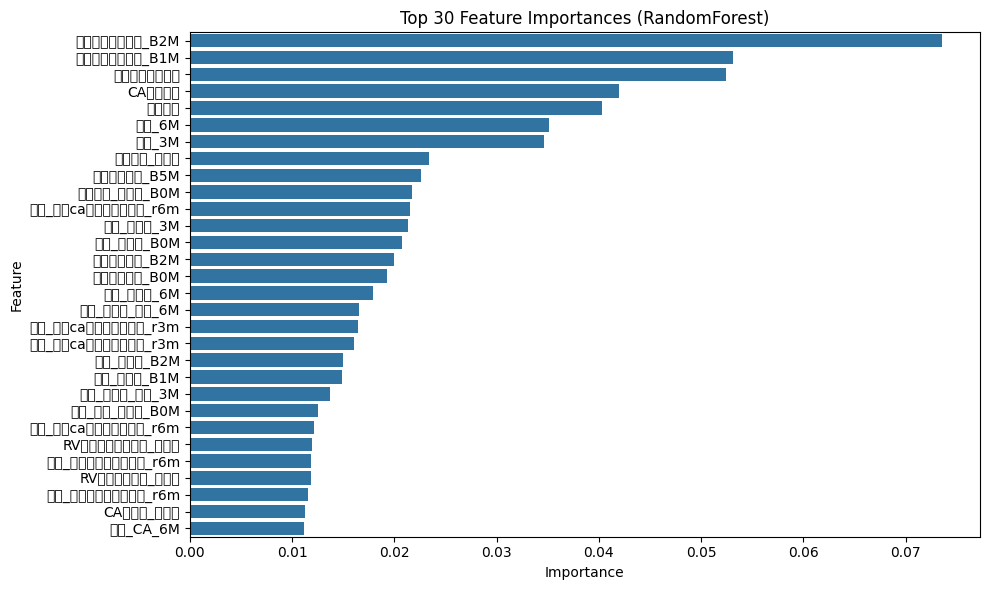

주요 변수 상위 30개:
1. 카드이용한도금액_B2M
2. 카드이용한도금액_B1M
3. 카드이용한도금액
4. CA한도금액
5. 월중평잔
6. 평잔_6M
7. 평잔_3M
8. 월중평잔_일시불
9. 연체입금원금_B5M
10. 월중평잔_일시불_B0M
11. 잔액_신판ca평균한도소진율_r6m
12. 평잔_일시불_3M
13. 잔액_일시불_B0M
14. 연체입금원금_B2M
15. 연체입금원금_B0M
16. 평잔_일시불_6M
17. 평잔_일시불_해외_6M
18. 잔액_신판ca평균한도소진율_r3m
19. 잔액_신판ca최대한도소진율_r3m
20. 잔액_일시불_B2M
21. 잔액_일시불_B1M
22. 평잔_일시불_해외_3M
23. 잔액_할부_무이자_B0M
24. 잔액_신판ca최대한도소진율_r6m
25. RV현금서비스이자율_할인전
26. 잔액_신판평균한도소진율_r6m
27. RV일시불이자율_할인전
28. 잔액_신판최대한도소진율_r6m
29. CA이자율_할인전
30. 평잔_CA_6M


In [14]:
!apt-get -qq install -y fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ Feature importance 추출
importances = clf_3class.feature_importances_
feature_names = X3_tr.columns
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# ✅ 중요도 순 정렬
fi_df = fi_df.sort_values(by='Importance', ascending=False).head(30)

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Top 30 Feature Importances (RandomForest)')
plt.tight_layout()
plt.show()

# ✅ 주요 변수 리스트 출력
print("주요 변수 상위 30개:")
for i, feature in enumerate(fi_df['Feature'].values, start=1):
    print(f"{i}. {feature}")

lightGBM의 FI분석

<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython

LightGBM 중요 변수 Top 30 리스트:
1. 카드이용한도금액_B2M
2. 연체입금원금_B5M
3. CA한도금액
4. 카드이용한도금액
5. 카드이용한도금액_B1M
6. 연체입금원금_B2M
7. CL이자율_할인전
8. 연체입금원금_B0M
9. 평잔_일시불_6M
10. 평잔_3M
11. 변동률_일시불평잔
12. 변동률_잔액_일시불_B1M
13. CA이자율_할인전
14. 평잔_6M
15. 월중평잔_일시불_B0M
16. 변동률_잔액_B1M
17. RV일시불이자율_할인전
18. 잔액_신판ca평균한도소진율_r6m
19. 월중평잔
20. 잔액_신판ca최대한도소진율_r6m
21. 평잔_일시불_해외_6M
22. RV현금서비스이자율_할인전
23. 변동률_할부평잔
24. 월중평잔_일시불
25. 평잔_일시불_3M
26. 잔액_일시불_B1M
27. 잔액_신판ca최대한도소진율_r3m
28. 월상환론한도금액
29. 잔액_신판최대한도소진율_r3m
30. 최초한도금액


<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-b6a06afb0cf1>:22: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

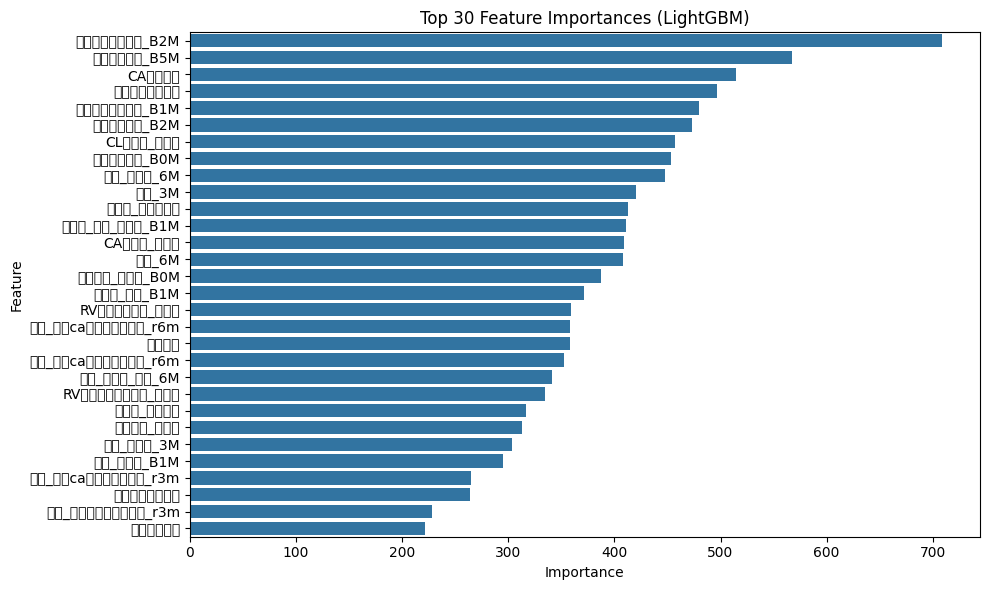

In [15]:
# ✅ 1. Feature Importance 추출
lgb_importances = lgbm.feature_importances_
lgb_feature_names = X3_tr.columns

lgb_fi_df = pd.DataFrame({
    'Feature': lgb_feature_names,
    'Importance': lgb_importances
})

# ✅ 2. 중요도 순 정렬
lgb_fi_df = lgb_fi_df.sort_values(by='Importance', ascending=False).head(30)

# ✅ 3. 주요 변수 리스트 출력 (번호 포함)
print("LightGBM 중요 변수 Top 30 리스트:")
for i, feature in enumerate(lgb_fi_df['Feature'].values, start=1):
    print(f"{i}. {feature}")

# ✅ 4. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgb_fi_df)
plt.title('Top 30 Feature Importances (LightGBM)')
plt.tight_layout()
plt.show()

XGBoost의 FI분석

<ipython-input-16-06d1fa2f68c2>:26: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-06d1fa2f68c2>:26: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-06d1fa2f68c2>:26: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-06d1fa2f68c2>:26: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-06d1fa2f68c2>:26: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-06d1fa2f68c2>:26: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-06d1fa2f68c2>:26: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyt

XGBoost 중요 변수 Top 30 리스트:
1. 평잔_6M
2. 평잔_CA_6M
3. 카드이용한도금액_B1M
4. 연체입금원금_B5M
5. RV_최대잔액_R3M
6. 카드이용한도금액_B2M
7. RV_최대잔액_R12M
8. RV_최대잔액_R6M
9. 상향가능CA한도금액
10. 한도증액횟수_R12M
11. 이용금액_연체_R3M
12. 월중평잔_일시불
13. IB문의건수_한도_R6M
14. 연체일수_최근
15. 연체건수_R3M
16. 한도증액금액_R12M
17. 이용횟수_연체_R6M
18. 연체입금원금_B0M
19. 월중평잔_일시불_B0M
20. 최초한도금액
21. RV_평균잔액_R12M
22. 월중평잔_카드론
23. 강제한도감액금액_R12M
24. 평잔_RV일시불_해외_3M
25. 월중평잔_CA_B0M
26. RP후경과월_통신
27. 잔액_카드론_B4M
28. 잔액_현금서비스_B0M
29. 연체건수_R6M
30. 연체일자_B0M


<ipython-input-16-06d1fa2f68c2>:26: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtoo

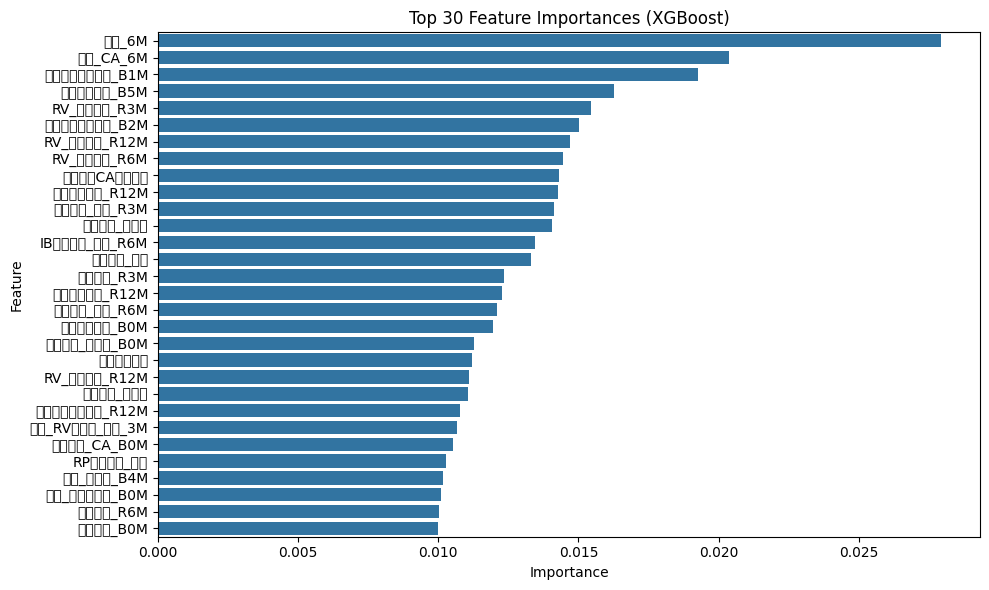

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ 1. Feature Importance 추출
xgb_importances = xgb_clf.feature_importances_
xgb_feature_names = X3_tr.columns

xgb_fi_df = pd.DataFrame({
    'Feature': xgb_feature_names,
    'Importance': xgb_importances
})

# ✅ 2. 중요도 순 정렬
xgb_fi_df = xgb_fi_df.sort_values(by='Importance', ascending=False).head(30)

# ✅ 3. 주요 변수 리스트 출력 (번호 포함)
print("XGBoost 중요 변수 Top 30 리스트:")
for i, feature in enumerate(xgb_fi_df['Feature'].values, start=1):
    print(f"{i}. {feature}")

# ✅ 4. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_fi_df)
plt.title('Top 30 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

3가지 모델의 FI 분석

In [17]:
# 📌 1. 세 모델의 Top 30 중요 변수 리스트
rf_top_features = fi_df['Feature'].head(30).tolist()
xgb_top_features = xgb_fi_df['Feature'].head(30).tolist()
lgb_top_features = lgb_fi_df['Feature'].head(30).tolist()

# 📌 2. 공통 변수
common_all = list(set(rf_top_features) & set(xgb_top_features) & set(lgb_top_features))
common_rf_xgb = list(set(rf_top_features) & set(xgb_top_features) - set(lgb_top_features))
common_rf_lgb = list(set(rf_top_features) & set(lgb_top_features) - set(xgb_top_features))
common_xgb_lgb = list(set(xgb_top_features) & set(lgb_top_features) - set(rf_top_features))

# 📌 3. 고유 변수
rf_only = list(set(rf_top_features) - set(xgb_top_features) - set(lgb_top_features))
xgb_only = list(set(xgb_top_features) - set(rf_top_features) - set(lgb_top_features))
lgb_only = list(set(lgb_top_features) - set(rf_top_features) - set(xgb_top_features))

# 📌 4. 결과 출력
print("🔗 [공통 중요 변수 - RF, XGB, LGB]")
for i, feat in enumerate(common_all, 1):
    print(f"{i}. {feat}")

print("\n🔗 [공통 중요 변수 - RF & XGB]")
for i, feat in enumerate(common_rf_xgb, 1):
    print(f"{i}. {feat}")

print("\n🔗 [공통 중요 변수 - RF & LGB]")
for i, feat in enumerate(common_rf_lgb, 1):
    print(f"{i}. {feat}")

print("\n🔗 [공통 중요 변수 - XGB & LGB]")
for i, feat in enumerate(common_xgb_lgb, 1):
    print(f"{i}. {feat}")

print("\n❗ [RF 단독 중요 변수]")
for i, feat in enumerate(rf_only, 1):
    print(f"{i}. {feat}")

print("\n❗ [XGB 단독 중요 변수]")
for i, feat in enumerate(xgb_only, 1):
    print(f"{i}. {feat}")

print("\n❗ [LGB 단독 중요 변수]")
for i, feat in enumerate(lgb_only, 1):
    print(f"{i}. {feat}")

🔗 [공통 중요 변수 - RF, XGB, LGB]
1. 평잔_6M
2. 월중평잔_일시불_B0M
3. 연체입금원금_B0M
4. 월중평잔_일시불
5. 연체입금원금_B5M
6. 카드이용한도금액_B2M
7. 카드이용한도금액_B1M

🔗 [공통 중요 변수 - RF & XGB]
1. 평잔_CA_6M

🔗 [공통 중요 변수 - RF & LGB]
1. 평잔_일시불_해외_6M
2. 평잔_일시불_3M
3. RV일시불이자율_할인전
4. 잔액_일시불_B1M
5. 월중평잔
6. 연체입금원금_B2M
7. 잔액_신판ca최대한도소진율_r3m
8. CA한도금액
9. 카드이용한도금액
10. 평잔_3M
11. RV현금서비스이자율_할인전
12. 잔액_신판ca평균한도소진율_r6m
13. CA이자율_할인전
14. 평잔_일시불_6M
15. 잔액_신판ca최대한도소진율_r6m

🔗 [공통 중요 변수 - XGB & LGB]
1. 최초한도금액

❗ [RF 단독 중요 변수]
1. 잔액_신판평균한도소진율_r6m
2. 잔액_일시불_B2M
3. 평잔_일시불_해외_3M
4. 잔액_할부_무이자_B0M
5. 잔액_신판최대한도소진율_r6m
6. 잔액_일시불_B0M
7. 잔액_신판ca평균한도소진율_r3m

❗ [XGB 단독 중요 변수]
1. IB문의건수_한도_R6M
2. 강제한도감액금액_R12M
3. 한도증액횟수_R12M
4. 이용횟수_연체_R6M
5. 이용금액_연체_R3M
6. 평잔_RV일시불_해외_3M
7. RV_최대잔액_R12M
8. RV_최대잔액_R6M
9. 연체건수_R6M
10. 잔액_카드론_B4M
11. 연체건수_R3M
12. 잔액_현금서비스_B0M
13. 한도증액금액_R12M
14. RV_최대잔액_R3M
15. 월중평잔_카드론
16. RV_평균잔액_R12M
17. 연체일자_B0M
18. RP후경과월_통신
19. 상향가능CA한도금액
20. 월중평잔_CA_B0M
21. 연체일수_최근

❗ [LGB 단독 중요 변수]
1. 변동률_일시불평잔
2. 변동률_잔액_B1M
3. 잔액_신판최대한도소진율_r3m
4. 변동률_잔액

top30 변수 리스트


In [18]:
# 각 모델의 FI 상위 30개 변수 리스트
rf_top30 = fi_df['Feature'].head(30).tolist()
xgb_top30 = xgb_fi_df['Feature'].head(30).tolist()
lgb_top30 = lgb_fi_df['Feature'].head(30).tolist()

# 전체에서 빈도 기반으로 가장 많이 등장한 Top 30 변수 선정
from collections import Counter

# 변수들 모아서 빈도 계산
all_top_features = rf_top30 + xgb_top30 + lgb_top30
top_30_features = [item[0] for item in Counter(all_top_features).most_common(30)]

3가지 모델 FI분석 - RF

[Top 30 Feature 기반 RandomForest 성능 평가]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
AB,0.000,0.000,0.000,6.000
C,0.692,0.395,0.503,751.000
D,0.809,0.939,0.869,2054.000
accuracy,0.792,0.792,0.792,0.792
macro avg,0.501,0.445,0.458,2811.000
weighted avg,0.776,0.792,0.770,2811.000


<ipython-input-19-da4d6fcad92e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_df, x='Metric', y='Score', palette='Blues_d')
<ipython-input-19-da4d6fcad92e>:41: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-da4d6fcad92e>:41: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-da4d6fcad92e>:41: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-da4d6fcad92e>:41: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font

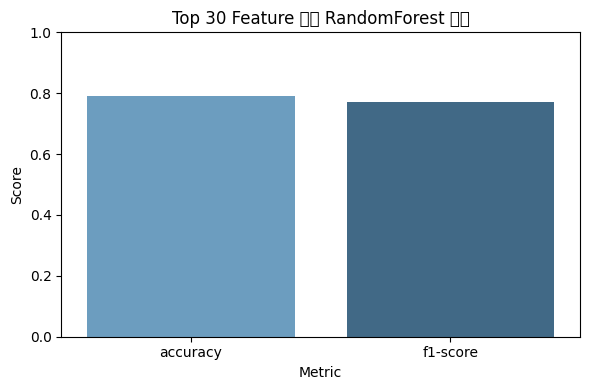

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# ✅ 실제 존재하는 컬럼으로 필터링
top_30_features_valid = [col for col in top_30_features if col in X3_tr.columns]

# ✅ 데이터 추출
X3_tr_top30 = X3_tr[top_30_features_valid]
X3_val_top30 = X3_val[top_30_features_valid]

# ✅ 모델 정의 및 학습
rf_top30 = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_top30.fit(X3_tr_top30, y3_tr)

# ✅ 예측
y_pred_top30 = rf_top30.predict(X3_val_top30)

# ✅ 성능 평가
report_top30 = classification_report(y3_val, y_pred_top30, output_dict=True)
report_df = pd.DataFrame(report_top30).transpose()

# ✅ 전체 지표 출력
print("[Top 30 Feature 기반 RandomForest 성능 평가]")
display(report_df.round(3))  # 소수점 3자리로 보기 좋게 출력

# ✅ 정확도 및 f1-score 시각화용 데이터 구성
scores = {
    'accuracy': report_df.loc['accuracy']['precision'],
    'f1-score': report_df.loc['weighted avg']['f1-score']
}
score_df = pd.DataFrame(list(scores.items()), columns=['Metric', 'Score'])

# ✅ 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score', palette='Blues_d')
plt.ylim(0, 1)
plt.title('Top 30 Feature 기반 RandomForest 성능')
plt.tight_layout()
plt.show()

3가지 모델 FI분석 - XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:20:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

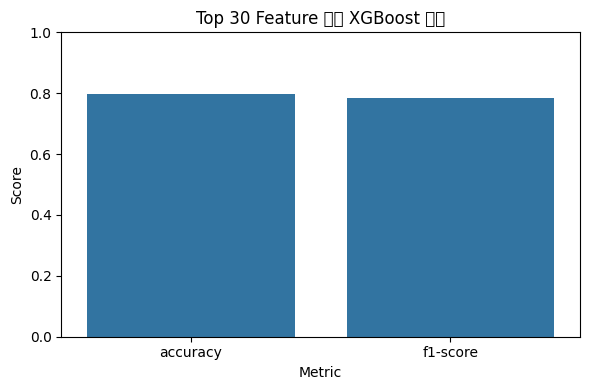

XGBoost 평가 상세 결과 (Top 30 Feature)
              precision  recall  f1-score
AB                0.000   0.000     0.000
C                 0.661   0.483     0.558
D                 0.828   0.912     0.868
accuracy          0.796   0.796     0.796
macro avg         0.497   0.465     0.476
weighted avg      0.782   0.796     0.784


In [20]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ 레이블 인코딩
le = LabelEncoder()
y3_tr_enc = le.fit_transform(y3_tr)
y3_val_enc = le.transform(y3_val)

# ✅ 유효한 feature 필터링
top_30_features_valid = [col for col in top_30_features if col in X3_tr.columns]
X3_tr_top30 = X3_tr[top_30_features_valid]
X3_val_top30 = X3_val[top_30_features_valid]

# ✅ 모델 정의 및 학습
xgb_top30 = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)
xgb_top30.fit(X3_tr_top30, y3_tr_enc)

# ✅ 예측
y_pred_top30_enc = xgb_top30.predict(X3_val_top30)
y_pred_top30 = le.inverse_transform(y_pred_top30_enc)

# ✅ 평가
report_top30 = classification_report(y3_val, y_pred_top30, output_dict=True)
report_df = pd.DataFrame(report_top30).transpose()

# ✅ 정확도 및 f1-score 시각화용 데이터 구성
scores = {
    'accuracy': report_df.loc['accuracy']['precision'],
    'f1-score': report_df.loc['weighted avg']['f1-score']
}
score_df = pd.DataFrame(list(scores.items()), columns=['Metric', 'Score'])

# ✅ 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('Top 30 Feature 기반 XGBoost 성능')
plt.tight_layout()
plt.show()

# ✅ 상세 보고서 출력
print("XGBoost 평가 상세 결과 (Top 30 Feature)")
print(report_df[['precision', 'recall', 'f1-score']].round(3))

SMOTE -> AB 데이터 증강

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 결측치가 있는 경우 0으로 대체 (예: 연체 관련 파생 변수)
X3_tr = X3_tr.fillna(0)

# SMOTE 적용 전 클래스 분포 확인
print("Before SMOTE:", Counter(y3_tr))

# SMOTE 객체 생성 및 적용
smote = SMOTE(random_state=42)
X3_tr_smote, y3_tr_smote = smote.fit_resample(X3_tr, y3_tr)

# SMOTE 적용 후 클래스 분포 확인
print("After SMOTE:", Counter(y3_tr_smote))

Before SMOTE: Counter({'D': 8216, 'C': 3002, 'AB': 26})
After SMOTE: Counter({'C': 8216, 'D': 8216, 'AB': 8216})


SMOTE 후 RF

Before SMOTE: Counter({'D': 8216, 'C': 3002, 'AB': 26})
After SMOTE: Counter({'C': 8216, 'D': 8216, 'AB': 8216})


<ipython-input-22-1413cf7d9250>:55: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-1413cf7d9250>:55: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-1413cf7d9250>:55: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-1413cf7d9250>:55: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-1413cf7d9250>:55: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:


[3-Class Classification Report - RandomForest]
              precision    recall  f1-score   support

          AB       1.00      0.17      0.29         6
           C       0.63      0.54      0.58       751
           D       0.84      0.89      0.86      2054

    accuracy                           0.79      2811
   macro avg       0.82      0.53      0.58      2811
weighted avg       0.78      0.79      0.79      2811


[Confusion Matrix - RandomForest]
Labels: ['AB', 'C', 'D']
[[   1    5    0]
 [   0  406  345]
 [   0  233 1821]]


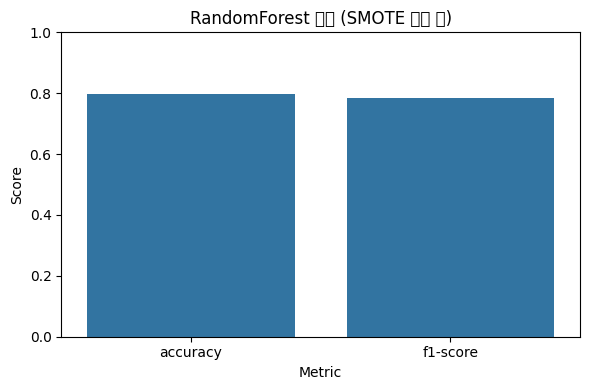

SMOTE 적용 후 RandomForest 상세 성능:
              precision  recall  f1-score   support
AB                0.000   0.000     0.000     6.000
C                 0.661   0.483     0.558   751.000
D                 0.828   0.912     0.868  2054.000
accuracy          0.796   0.796     0.796     0.796
macro avg         0.497   0.465     0.476  2811.000
weighted avg      0.782   0.796     0.784  2811.000


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# 1. 결측치 처리
X3_tr_clean = X3_tr.fillna(0)
X3_val_clean = X3_val.fillna(0)

# 2. SMOTE 적용 전 클래스 분포 확인
print("Before SMOTE:", Counter(y3_tr))

# 3. SMOTE 적용
smote = SMOTE(random_state=42)
X3_tr_smote, y3_tr_smote = smote.fit_resample(X3_tr_clean, y3_tr)

print("After SMOTE:", Counter(y3_tr_smote))

# 4. 모델 학습
rf_smote = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_smote.fit(X3_tr_smote, y3_tr_smote)

# 5. 검증 세트 컬럼 맞춤
X3_val_aligned = X3_val_clean[X3_tr_smote.columns]

from sklearn.metrics import classification_report, confusion_matrix

# 6. 예측 및 평가
y3_pred_smote = rf_smote.predict(X3_val_aligned)

# Classification Report 출력
print("\n[3-Class Classification Report - RandomForest]")
print(classification_report(y3_val, y3_pred_smote, digits=2))

# Confusion Matrix 출력
cm = confusion_matrix(y3_val, y3_pred_smote, labels=rf_smote.classes_)
print("\n[Confusion Matrix - RandomForest]")
print("Labels:", rf_smote.classes_.tolist())
print(cm)

# 7. 정확도 및 f1-score 시각화
score_dict = {
    'accuracy': report_df.loc['accuracy']['precision'],
    'f1-score': report_df.loc['weighted avg']['f1-score']
}
score_df = pd.DataFrame(score_dict.items(), columns=['Metric', 'Score'])

plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('RandomForest 성능 (SMOTE 적용 후)')
plt.tight_layout()
plt.show()

# 8. 상세 리포트 출력
print("SMOTE 적용 후 RandomForest 상세 성능:")
print(report_df.round(3))

SMOTE 후 Xgboost

Before SMOTE: Counter({'D': 8216, 'C': 3002, 'AB': 26})
After SMOTE: Counter({'C': 8216, 'D': 8216, 'AB': 8216})


<ipython-input-23-09acafea0b03>:59: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-09acafea0b03>:59: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-09acafea0b03>:59: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-09acafea0b03>:59: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-p

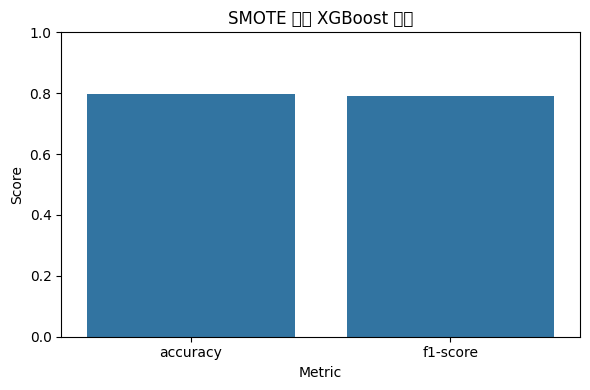


[3-Class Classification Report - XGBoost]
              precision    recall  f1-score   support

          AB       0.50      0.33      0.40         6
           C       0.65      0.53      0.59       751
           D       0.84      0.90      0.87      2054

    accuracy                           0.80      2811
   macro avg       0.66      0.59      0.62      2811
weighted avg       0.79      0.80      0.79      2811


[Confusion Matrix - XGBoost]
Labels: ['AB', 'C', 'D']
[[   2    4    0]
 [   2  400  349]
 [   0  210 1844]]


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# 1. 결측치 처리
X3_tr_clean = X3_tr.fillna(0)
X3_val_clean = X3_val.fillna(0)

# 2. SMOTE 적용 전 클래스 분포 확인
print("Before SMOTE:", Counter(y3_tr))

# 3. SMOTE 적용
smote = SMOTE(random_state=42)
X3_tr_smote, y3_tr_smote = smote.fit_resample(X3_tr_clean, y3_tr)

print("After SMOTE:", Counter(y3_tr_smote))

# 4. Label Encoding
le = LabelEncoder()
y3_tr_smote_encoded = le.fit_transform(y3_tr_smote)
y3_val_encoded = le.transform(y3_val)

# 5. XGBoost 모델 정의 및 학습
xgb_smote = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)
xgb_smote.fit(X3_tr_smote, y3_tr_smote_encoded)

# 6. 검증 데이터 컬럼 정렬
X3_val_fixed = X3_val_clean[X3_tr_smote.columns]

# 7. 예측 및 역변환
y3_pred_encoded = xgb_smote.predict(X3_val_fixed)
y3_pred = le.inverse_transform(y3_pred_encoded)

# 8. 성능 평가
report_xgb = classification_report(y3_val, y3_pred, output_dict=True)
report_df_xgb = pd.DataFrame(report_xgb).transpose()

# 9. 성능 시각화
score_df = pd.DataFrame({
    'Metric': ['accuracy', 'f1-score'],
    'Score': [report_df_xgb.loc['accuracy']['precision'], report_df_xgb.loc['weighted avg']['f1-score']]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('SMOTE 기반 XGBoost 성능')
plt.tight_layout()
plt.show()

# 10. 상세 리포트 출력
print("\n[3-Class Classification Report - XGBoost]")
print(classification_report(y3_val, y3_pred, digits=2))

# 11. Confusion Matrix 출력
cm = confusion_matrix(y3_val, y3_pred, labels=le.classes_)
print("\n[Confusion Matrix - XGBoost]")
print("Labels:", le.classes_.tolist())
print(cm)

In [24]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


catboost로 진행

Before SMOTE: Counter({'D': 8216, 'C': 3002, 'AB': 26})
After SMOTE: Counter({'C': 8216, 'D': 8216, 'AB': 8216})


<ipython-input-25-b5634d989272>:57: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-b5634d989272>:57: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-b5634d989272>:57: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-b5634d989272>:57: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-p

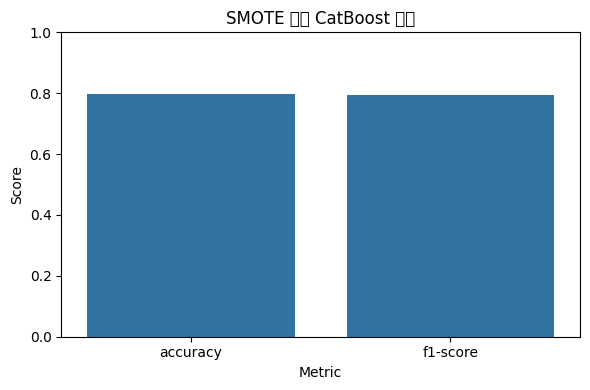


[3-Class Classification Report - CatBoost]
              precision    recall  f1-score   support

          AB       0.27      0.50      0.35         6
           C       0.64      0.55      0.59       751
           D       0.85      0.89      0.87      2054

    accuracy                           0.80      2811
   macro avg       0.59      0.65      0.60      2811
weighted avg       0.79      0.80      0.79      2811


[Confusion Matrix - CatBoost]
Labels: ['AB', 'C', 'D']
[[   3    3    0]
 [   7  413  331]
 [   1  226 1827]]


In [25]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. 결측치 처리
X3_tr_clean = X3_tr.fillna(0)
X3_val_clean = X3_val.fillna(0)

# 2. SMOTE 적용 전 클래스 분포 확인
print("Before SMOTE:", Counter(y3_tr))

# 3. SMOTE 적용
smote = SMOTE(random_state=42)
X3_tr_smote, y3_tr_smote = smote.fit_resample(X3_tr_clean, y3_tr)

print("After SMOTE:", Counter(y3_tr_smote))

# 4. 레이블 인코딩
le = LabelEncoder()
y3_tr_smote_encoded = le.fit_transform(y3_tr_smote)
y3_val_encoded = le.transform(y3_val)

# 5. CatBoost 모델 정의 및 학습
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    verbose=0,
    random_seed=42
)
cat_model.fit(X3_tr_smote, y3_tr_smote_encoded)

# 6. 예측 및 역변환
y3_pred_encoded = cat_model.predict(X3_val_clean)
y3_pred = le.inverse_transform(y3_pred_encoded.flatten())

# 7. 성능 평가
report_cat = classification_report(y3_val, y3_pred, output_dict=True)
report_df_cat = pd.DataFrame(report_cat).transpose()

# 8. 성능 시각화
score_df = pd.DataFrame({
    'Metric': ['accuracy', 'f1-score'],
    'Score': [report_df_cat.loc['accuracy']['precision'], report_df_cat.loc['weighted avg']['f1-score']]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('SMOTE 기반 CatBoost 성능')
plt.tight_layout()
plt.show()

# 9. 상세 결과 출력
print("\n[3-Class Classification Report - CatBoost]")
print(classification_report(y3_val, y3_pred, digits=2))

# 10. Confusion Matrix 출력
cm = confusion_matrix(y3_val, y3_pred, labels=le.classes_)
print("\n[Confusion Matrix - CatBoost]")
print("Labels:", le.classes_.tolist())
print(cm)

CatBoost 클래스 가중치 (smote X)

In [26]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from collections import Counter

# 1. 결측치 처리
X3_tr_clean = X3_tr.fillna(0)
X3_val_clean = X3_val.fillna(0)

# 2. 레이블 인코딩
le = LabelEncoder()
y3_tr_encoded = le.fit_transform(y3_tr)
y3_val_encoded = le.transform(y3_val)

# 3. CatBoost 모델 정의 (클래스 가중치 적용)
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=0
)

# 4. 학습
cat_model.fit(X3_tr_clean, y3_tr_encoded)

# 5. 예측 및 역변환
y3_pred_encoded = cat_model.predict(X3_val_clean)
y3_pred = le.inverse_transform(y3_pred_encoded.flatten())

# 6. 성능 평가
report_cat = classification_report(y3_val, y3_pred, output_dict=True)
report_df_cat = pd.DataFrame(report_cat).transpose()

# 7. 출력
print("\n[3-Class Classification Report - CatBoost (Class Weight)]")
print(report_df_cat[['precision', 'recall', 'f1-score']].round(3))

# 8. Confusion Matrix
cm = confusion_matrix(y3_val, y3_pred, labels=le.classes_)
print("\n[Confusion Matrix - CatBoost (Class Weight)]")
print(f"Labels: {list(le.classes_)}")
print(cm)


[3-Class Classification Report - CatBoost (Class Weight)]
              precision  recall  f1-score
AB                0.500   0.667     0.571
C                 0.561   0.696     0.622
D                 0.880   0.801     0.839
accuracy          0.773   0.773     0.773
macro avg         0.647   0.721     0.677
weighted avg      0.794   0.773     0.780

[Confusion Matrix - CatBoost (Class Weight)]
Labels: ['AB', 'C', 'D']
[[   4    2    0]
 [   3  523  225]
 [   1  407 1646]]


클래스 가중치 기반 XGBoost

In [27]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from collections import Counter

# 1. 레이블 인코딩
le = LabelEncoder()
y3_tr_encoded = le.fit_transform(y3_tr)
y3_val_encoded = le.transform(y3_val)

# 2. 클래스 가중치 → sample_weight 계산
sample_weight = compute_sample_weight(class_weight='balanced', y=y3_tr_encoded)

# 3. XGBoost 모델 정의
xgb_weighted = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# 4. 학습
xgb_weighted.fit(X3_tr, y3_tr_encoded, sample_weight=sample_weight)

# 5. 예측 및 역변환
y3_pred_encoded = xgb_weighted.predict(X3_val)
y3_pred = le.inverse_transform(y3_pred_encoded)

# 6. 성능 평가
report = classification_report(y3_val, y3_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 7. 출력
print("\n[3-Class Classification Report - XGBoost (Class Weight)]")
print(report_df[['precision', 'recall', 'f1-score']].round(3))

# 8. Confusion Matrix
cm = confusion_matrix(y3_val, y3_pred, labels=le.classes_)
print("\n[Confusion Matrix - XGBoost (Class Weight)]")
print(f"Labels: {list(le.classes_)}")
print(cm)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



[3-Class Classification Report - XGBoost (Class Weight)]
              precision  recall  f1-score
AB                0.250   0.167     0.200
C                 0.604   0.597     0.600
D                 0.854   0.859     0.857
accuracy          0.787   0.787     0.787
macro avg         0.569   0.541     0.552
weighted avg      0.786   0.787     0.787

[Confusion Matrix - XGBoost (Class Weight)]
Labels: ['AB', 'C', 'D']
[[   1    5    0]
 [   2  448  301]
 [   1  289 1764]]


SMOTE : XGBoost + RandomizedSearchCV

⚡ Random Search 진행중:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-28-f81daa8d6ce2>:83: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-f81daa8d6ce2>:83: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-f81daa8d6ce2>:83: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-f81daa8d6ce2>:83: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-p

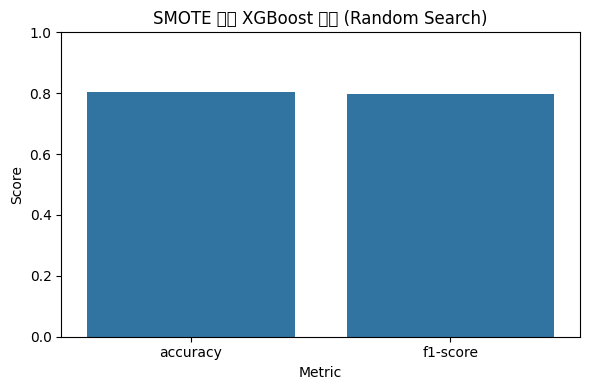

XGBoost 최적 파라미터: {'colsample_bytree': np.float64(0.7545474901621302), 'gamma': np.float64(0.9170225492671691), 'learning_rate': np.float64(0.07084844859190755), 'max_depth': 8, 'n_estimators': 352, 'reg_alpha': np.float64(2.1597250932105787), 'reg_lambda': np.float64(1.4561457009902097), 'subsample': np.float64(0.8835558684167137)}
XGBoost 성능 상세:
              precision    recall  f1-score
AB             0.333333  0.500000  0.400000
C              0.668350  0.528628  0.590335
D              0.842391  0.905550  0.872830
accuracy       0.803984  0.803984  0.803984
macro avg      0.614692  0.644726  0.621055
weighted avg   0.794807  0.803984  0.796348


In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform
from tqdm.auto import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 레이블 인코딩
le = LabelEncoder()
y3_tr_smote_enc = le.fit_transform(y3_tr_smote)
y3_val_enc = le.transform(y3_val)

# 2. 파라미터 탐색 공간 정의
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 5),
    'reg_lambda': uniform(0, 5)
}

# 3. XGBoost 모델 정의
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# 4. RandomizedSearchCV 래핑 (진행률 표시 포함)
class TqdmRandomizedSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        with tqdm(total=self.n_iter, desc="⚡ Random Search 진행중") as pbar:
            self._pbar = pbar
            return super().fit(X, y, **fit_params)

    def _run_search(self, evaluate_candidates):
        def wrapped(candidate_params):
            results = evaluate_candidates(candidate_params)
            self._pbar.update(len(candidate_params))
            return results
        return super()._run_search(wrapped)

# 5. 탐색기 정의 및 학습 시작
random_search = TqdmRandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,  # 탐색 횟수: 20개
    scoring='f1_weighted',
    cv=3,
    verbose=0,
    random_state=42
)

random_search.fit(X3_tr_smote, y3_tr_smote_enc)

# 6. 최적 모델 성능 평가
best_xgb = random_search.best_estimator_
y3_pred_enc = best_xgb.predict(X3_val)
y3_pred = le.inverse_transform(y3_pred_enc)

# 7. 리포트 및 시각화
report_xgb = classification_report(y3_val, y3_pred, output_dict=True)
report_df_xgb = pd.DataFrame(report_xgb).transpose()

score_df = pd.DataFrame({
    'Metric': ['accuracy', 'f1-score'],
    'Score': [report_df_xgb.loc['accuracy']['precision'], report_df_xgb.loc['weighted avg']['f1-score']]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('SMOTE 기반 XGBoost 성능 (Random Search)')
plt.tight_layout()
plt.show()

print("XGBoost 최적 파라미터:", random_search.best_params_)
print("XGBoost 성능 상세:")
print(report_df_xgb[['precision', 'recall', 'f1-score']])

SMOTE : CatBoost + RandomizedSearchCV

⚡ Random Search 진행중 (CatBoost):   0%|          | 0/20 [00:00<?, ?it/s]

CatBoost 최적 파라미터: {'depth': 9, 'iterations': 489, 'l2_leaf_reg': np.float64(3.079416628681888), 'learning_rate': np.float64(0.1235400655639983), 'random_strength': np.float64(0.15656646227779292)}

CatBoost 성능 상세:
              precision    recall  f1-score
AB             0.333333  0.166667  0.222222
C              0.657895  0.532623  0.588668
D              0.841364  0.901168  0.870240
accuracy       0.801138  0.801138  0.801138
macro avg      0.610864  0.533486  0.560377
weighted avg   0.791263  0.801138  0.793631


<ipython-input-29-3b486a0cb3ec>:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-3b486a0cb3ec>:82: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-3b486a0cb3ec>:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-3b486a0cb3ec>:82: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


NameError: name 'splt' is not defined

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4815

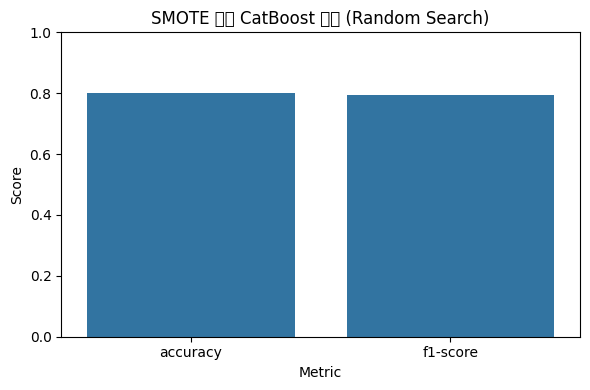

In [29]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

# 1. 레이블 인코딩
le = LabelEncoder()
y3_tr_smote_enc = le.fit_transform(y3_tr_smote)
y3_val_enc = le.transform(y3_val)

# 2. 파라미터 탐색 공간 정의
param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.2),
    'iterations': randint(100, 500),
    'l2_leaf_reg': uniform(1, 10),
    'random_strength': uniform(0, 5)
}

# 3. CatBoost 모델 정의
cat_model = CatBoostClassifier(
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

# 4. tqdm RandomizedSearchCV 래핑
class TqdmRandomizedSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        with tqdm(total=self.n_iter, desc="⚡ Random Search 진행중 (CatBoost)") as pbar:
            self._pbar = pbar
            return super().fit(X, y, **fit_params)

    def _run_search(self, evaluate_candidates):
        def wrapped(candidate_params):
            results = evaluate_candidates(candidate_params)
            self._pbar.update(len(candidate_params))
            return results
        return super()._run_search(wrapped)

# 5. 탐색기 정의 및 학습
random_search_cat = TqdmRandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_weighted',
    cv=3,
    verbose=0,
    random_state=42
)

random_search_cat.fit(X3_tr_smote, y3_tr_smote_enc)

# 6. 예측
best_cat = random_search_cat.best_estimator_
y3_pred_enc = best_cat.predict(X3_val)
y3_pred = le.inverse_transform(y3_pred_enc.flatten())

# 7. 평가 및 출력
report_cat = classification_report(y3_val, y3_pred, output_dict=True)
report_df_cat = pd.DataFrame(report_cat).transpose()

print("CatBoost 최적 파라미터:", random_search_cat.best_params_)
print("\nCatBoost 성능 상세:")
print(report_df_cat[['precision', 'recall', 'f1-score']])

# 8. 간단 시각화
score_df = pd.DataFrame({
    'Metric': ['accuracy', 'f1-score'],
    'Score': [report_df_cat.loc['accuracy']['precision'], report_df_cat.loc['weighted avg']['f1-score']]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('SMOTE 기반 CatBoost 성능 (Random Search)')
plt.tight_layout()
splt.show()

Soft Voting 앙상블

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ 1. 레이블 인코딩 (이미 한 경우 생략 가능)
le = LabelEncoder()
y3_tr_smote_enc = le.fit_transform(y3_tr_smote)
y3_val_enc = le.transform(y3_val)

# ✅ 2. Soft Voting 앙상블 정의
voting_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),   # ✅ RandomizedSearchCV 결과로 도출된 XGBoost
        ('cat', best_cat)    # ✅ RandomizedSearchCV 결과로 도출된 CatBoost
    ],
    voting='soft'  # 확률 평균 방식
)

# ✅ 3. 학습
voting_model.fit(X3_tr_smote, y3_tr_smote_enc)

# ✅ 4. 예측 및 역변환
y_pred_ens_enc = voting_model.predict(X3_val)
y_pred_ens = le.inverse_transform(y_pred_ens_enc)

# ✅ 5. 리포트 및 출력
report_ens = classification_report(y3_val, y_pred_ens, output_dict=True)
report_df_ens = pd.DataFrame(report_ens).transpose()

print("\n📊 [3-Class Classification Report - VotingClassifier (Soft)]")
print(report_df_ens[['precision', 'recall', 'f1-score']].round(3))

# ✅ 6. Confusion Matrix
cm = confusion_matrix(y3_val, y_pred_ens, labels=le.classes_)
print("\n[Confusion Matrix - VotingClassifier (Soft)]")
print("Labels:", list(le.classes_))
print(cm)

# ✅ 7. 정확도 & F1-score 시각화
score_df = pd.DataFrame({
    'Metric': ['accuracy', 'f1-score'],
    'Score': [
        report_df_ens.loc['accuracy']['precision'],  # accuracy는 precision key에 저장됨
        report_df_ens.loc['weighted avg']['f1-score']
    ]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('VotingClassifier 성능 (SMOTE + XGBoost + CatBoost)')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

SMOTE : LGBM + RandomizedSearchCV

🔍 LGBM Random Search:   0%|          | 0/20 [00:00<?, ?it/s]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<ipython-input-33-8859b52a9da1>:79: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-8859b52a9da1>:79: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-8859b52a9da1>:79: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-8859b52a9da1>:79: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-p

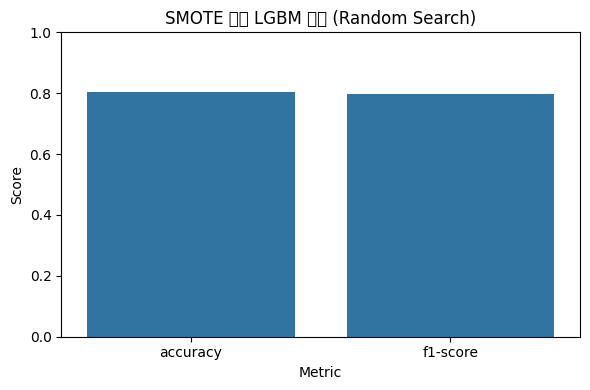

LGBM 최적 파라미터: {'colsample_bytree': np.float64(0.7076257380232285), 'learning_rate': np.float64(0.031578285398660894), 'max_depth': 9, 'n_estimators': 451, 'num_leaves': 46, 'reg_alpha': np.float64(3.4775804321306376), 'reg_lambda': np.float64(0.6966572720293784), 'subsample': np.float64(0.8813252137833452)}
LGBM 성능 상세:
              precision    recall  f1-score
AB             0.500000  0.500000  0.500000
C              0.675862  0.521971  0.589031
D              0.839551  0.909445  0.873101
accuracy       0.805052  0.805052  0.805052
macro avg      0.671804  0.643805  0.654044
weighted avg   0.795094  0.805052  0.796411


In [33]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint, uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

# 1. 레이블 인코딩
le = LabelEncoder()
y3_tr_smote_enc = le.fit_transform(y3_tr_smote)
y3_val_enc = le.transform(y3_val)

# 2. 파라미터 탐색 공간 정의
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'num_leaves': randint(15, 50),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'reg_alpha': uniform(0, 5),
    'reg_lambda': uniform(0, 5)
}

# 3. LGBM 모델 정의
lgbm = LGBMClassifier(
    objective='multiclass',
    random_state=42,
    n_jobs=-1
)

# 4. 진행률 포함 RandomizedSearchCV 클래스 정의
class TqdmRandomizedSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        with tqdm(total=self.n_iter, desc="🔍 LGBM Random Search") as pbar:
            self._pbar = pbar
            return super().fit(X, y, **fit_params)

    def _run_search(self, evaluate_candidates):
        def wrapped(candidate_params):
            results = evaluate_candidates(candidate_params)
            self._pbar.update(len(candidate_params))
            return results
        return super()._run_search(wrapped)

# 5. 탐색기 정의 및 학습
random_search_lgbm = TqdmRandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_weighted',
    cv=3,
    random_state=42
)

random_search_lgbm.fit(X3_tr_smote, y3_tr_smote_enc)

# 6. 최적 모델 평가
best_lgbm = random_search_lgbm.best_estimator_
y3_pred_enc = best_lgbm.predict(X3_val)
y3_pred = le.inverse_transform(y3_pred_enc)

# 7. 리포트 및 시각화
report_lgbm = classification_report(y3_val, y3_pred, output_dict=True)
report_df_lgbm = pd.DataFrame(report_lgbm).transpose()

score_df = pd.DataFrame({
    'Metric': ['accuracy', 'f1-score'],
    'Score': [report_df_lgbm.loc['accuracy']['precision'], report_df_lgbm.loc['weighted avg']['f1-score']]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('SMOTE 기반 LGBM 성능 (Random Search)')
plt.tight_layout()
plt.show()

# 출력
print("LGBM 최적 파라미터:", random_search_lgbm.best_params_)
print("LGBM 성능 상세:")
print(report_df_lgbm[['precision', 'recall', 'f1-score']])

Soft Voting 앙상블 (SMOTE 기반 XGB + CAT + LGBM)

<ipython-input-34-0be810ce0ae1>:45: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-0be810ce0ae1>:45: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-0be810ce0ae1>:45: UserWarning: Glyph 50521 (\N{HANGUL SYLLABLE ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-0be810ce0ae1>:45: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-0be810ce0ae1>:45: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-0be810ce0ae1>:45: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-0be810ce0ae1>:45: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/

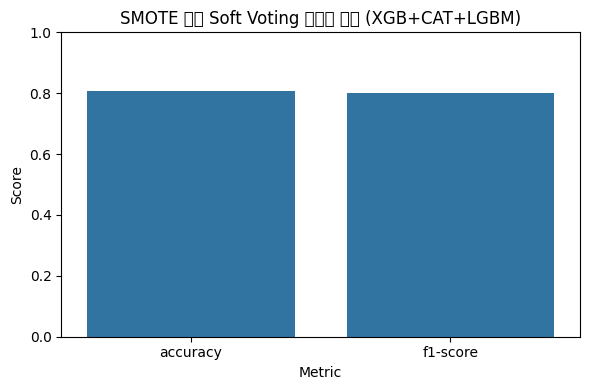


[3-Class Classification Report - VotingClassifier (Soft)]
              precision  recall  f1-score
AB                0.600   0.500     0.545
C                 0.674   0.535     0.597
D                 0.843   0.907     0.874
accuracy          0.807   0.807     0.807
macro avg         0.706   0.647     0.672
weighted avg      0.797   0.807     0.799

[Confusion Matrix - VotingClassifier (Soft)]
Labels: ['AB', 'C', 'D']
[[   3    3    0]
 [   2  402  347]
 [   0  191 1863]]


In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 레이블 인코딩 (재사용)
y3_val_enc = le.transform(y3_val)

# 2. Soft Voting 앙상블 구성
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('cat', best_cat),
        ('lgbm', best_lgbm)
    ],
    voting='soft',
    n_jobs=-1
)

# 3. 앙상블 학습
voting_clf.fit(X3_tr_smote, y3_tr_smote_enc)

# 4. 예측 및 역변환
y_pred_enc = voting_clf.predict(X3_val)
y_pred = le.inverse_transform(y_pred_enc)

# 5. 성능 평가
report = classification_report(y3_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 6. Confusion Matrix
cm = confusion_matrix(y3_val, y_pred, labels=le.classes_)

# 7. 정확도 및 f1-score 시각화
score_df = pd.DataFrame({
    'Metric': ['accuracy', 'f1-score'],
    'Score': [report_df.loc['accuracy']['precision'], report_df.loc['weighted avg']['f1-score']]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('SMOTE 기반 Soft Voting 앙상블 성능 (XGB+CAT+LGBM)')
plt.tight_layout()
plt.show()

# 8. 출력
print("\n[3-Class Classification Report - VotingClassifier (Soft)]")
print(report_df[['precision', 'recall', 'f1-score']].round(3))

print("\n[Confusion Matrix - VotingClassifier (Soft)]")
print("Labels:", le.classes_.tolist())
print(cm)

<ipython-input-36-18ec2a852bbd>:48: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-18ec2a852bbd>:48: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-18ec2a852bbd>:48: UserWarning: Glyph 50521 (\N{HANGUL SYLLABLE ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-18ec2a852bbd>:48: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-18ec2a852bbd>:48: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-18ec2a852bbd>:48: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-18ec2a852bbd>:48: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/

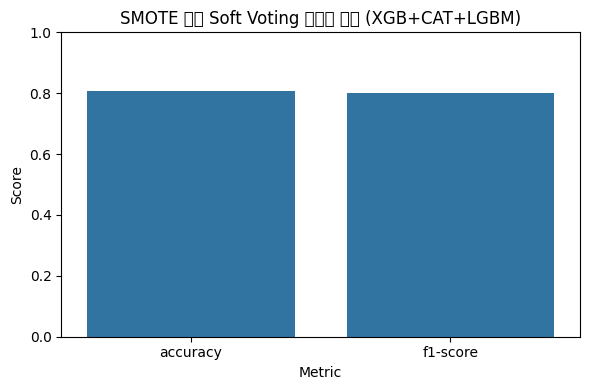


[3-Class Classification Report - VotingClassifier (Soft)]
              precision  recall  f1-score
AB                0.600   0.500     0.545
C                 0.674   0.535     0.597
D                 0.843   0.907     0.874
accuracy          0.807   0.807     0.807
macro avg         0.706   0.647     0.672
weighted avg      0.797   0.807     0.799

[Confusion Matrix - VotingClassifier (Soft)]
Labels: ['AB', 'C', 'D']
[[   3    3    0]
 [   2  402  347]
 [   0  191 1863]]


In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 테스트 데이터 불러오기 및 전처리
df_test = pd.read_csv('/content/drive/MyDrive/블루문/신용카드 세그먼트/card_test.csv')
X_test = df_test.select_dtypes(include=['float64', 'int64']).fillna(0)

# ✅ 라벨 인코딩 (재사용)
y3_val_enc = le.transform(y3_val)

# ✅ Soft Voting 앙상블 구성
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('cat', best_cat),
        ('lgbm', best_lgbm)
    ],
    voting='soft',
    n_jobs=-1
)

# ✅ 앙상블 학습
voting_clf.fit(X3_tr_smote, y3_tr_smote_enc)

# ✅ 검증 데이터 예측 및 평가
y_val_pred_enc = voting_clf.predict(X3_val)
y_val_pred = le.inverse_transform(y_val_pred_enc)

# 평가 리포트 출력
report = classification_report(y3_val, y_val_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Confusion Matrix 출력
cm = confusion_matrix(y3_val, y_val_pred, labels=le.classes_)

# 성능 시각화
score_df = pd.DataFrame({
    'Metric': ['accuracy', 'f1-score'],
    'Score': [report_df.loc['accuracy']['precision'], report_df.loc['weighted avg']['f1-score']]
})
plt.figure(figsize=(6, 4))
sns.barplot(data=score_df, x='Metric', y='Score')
plt.ylim(0, 1)
plt.title('SMOTE 기반 Soft Voting 앙상블 성능 (XGB+CAT+LGBM)')
plt.tight_layout()
plt.show()

# 리포트 출력
print("\n[3-Class Classification Report - VotingClassifier (Soft)]")
print(report_df[['precision', 'recall', 'f1-score']].round(3))

print("\n[Confusion Matrix - VotingClassifier (Soft)]")
print("Labels:", le.classes_.tolist())
print(cm)

# ✅ 테스트 데이터 예측 준비 (컬럼 정렬 및 누락 컬럼 처리)
train_columns = X3_tr_smote.columns
X_test_fixed = X_test.copy()

# 누락된 컬럼 보정 (값은 0으로 추가)
for col in train_columns:
    if col not in X_test_fixed.columns:
        X_test_fixed[col] = 0

# 학습 컬럼 순서에 맞게 정렬
X_test_fixed = X_test_fixed[train_columns]

# ✅ 테스트 데이터 예측 및 제출 파일 저장
y_test_pred_enc = voting_clf.predict(X_test_fixed)
y_test_pred = le.inverse_transform(y_test_pred_enc)

submission = pd.DataFrame({
    'ID': df_test['ID'],
    'Segment': y_test_pred
})
submission.to_csv('/content/drive/MyDrive/블루문/신용카드 세그먼트/SMOTE_XGB+CAT+LGBM.submission.csv', index=False)